<a href="https://colab.research.google.com/github/jordygunarko/Portfolio-Project/blob/main/Python_data_cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**

This is a case study from RevoU to demonstrate my ability in loading the data, cleaning the data, doing exploratory data analysis (EDA) and visualizing the data in Python.


#**Objective**


Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product, Gustavo wants you to conduct analysis on these datasets to find insights that could help the e-commerce startup. But the datasets aren't clean and doing analysis on a dirty dataset would lead to wasted time and useless insights. 

Therefore, the objective is to prepare and load the datasets, cleaning the datasets, analyze the datasets to extract the insights to help better business decision making.

# **Preparation & Data Overview**

In [90]:
#Importing the libraries needed
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#Orders Dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/17owMdJzYXAxzThfQqkFBJ19e6am1rRTNZdCobJsEYUQ/edit#gid=1282220914'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_trf)
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [92]:
#Customers Dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1R9fQ3Mgpvz-9ACLNenvTJj_f1gRDoKnxqsOIJAGlty8/edit#gid=1877083242'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df2 = pd.read_csv(sheet_url_trf)
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [93]:
#Order Payments Dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1208GGxn949DKhKpT4CPg-9DHDWgDFzFlhZLV6sO2rQA/edit#gid=1503129982'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df3 = pd.read_csv(sheet_url_trf)
df3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [94]:
#Making copies of original data before doing data cleaning
dfcl1 = df1.copy()
dfcl2 = df2.copy()
dfcl3 = df3.copy()

#**Data Cleaning**

## Removing Irrelevant Values

Dropping the customer_unique_id column on the customers dataset since the dataset itself already has an unique primary key (customer_id)

In [95]:
dfcl2 = dfcl2.drop(columns='customer_unique_id')
dfcl2

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


##Handling Missing Values


### Orders Dataset

In [96]:
#Total Null Values
dfcl1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [97]:
#Showing where the null values are, and putting the dataframe into a variable
dfcl1nulls = dfcl1[dfcl1.isnull().any(axis=1)]
dfcl1nulls

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 0:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 4:31:18,2018-06-05 14:32:00,NaN,2018-06-28 0:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 6:15:14,NaN,NaN,2018-08-21 0:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 0:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 2:32:30,2018-01-11 19:39:23,NaN,2018-02-07 0:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 0:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 7:18:05,NaN,NaN,2018-02-06 0:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 0:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 0:00:00


In [98]:
#Showing unique values for order_status column in original orders dataset
dfcl1['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [99]:
#Showing unique values for order_status column in the orders dataset that contains null values
print(dfcl1nulls['order_status'].value_counts(), '\n\n Total rows:', dfcl1nulls['order_status'].value_counts().sum())

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64 

 Total rows: 2980


Notice that inside the dataframe that shows the null values, all of the orders' status are mostly not 'delivered', only 23 out of 2980 rows that have the 'delivered' status. Meaning most of these orders that contains null values aren't completed. 

For the purpose of analyzing this dataset, it's best to analyze completed orders instead of pending orders, so we're dropping the null rows on the orders dataset.

In [100]:
#Dropping 2980 rows where there's null values, because the order_status is not 'delivered' or completed
dfcl1.dropna(axis=0, inplace=True)
dfcl1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [101]:
dfcl1['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

Decided to drop the 'cancelled' order status as well, in order to give more accurate analysis since these orders aren't completed.

In [102]:
dfcl1 = dfcl1[~dfcl1['order_status'].isin(['canceled'])]
dfcl1['order_status'].value_counts()

delivered    96455
Name: order_status, dtype: int64

###Customers Dataset


In [103]:
#Total Null Values
dfcl2.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

No Null Values

###Order Payment Dataset

In [104]:
#Total Null Values
dfcl3.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

No Null Values

##Checking for typos

Only check for typos on the columns that makes sense to have typos like object/string columns

### Orders Dataset

In [105]:
dfcl1['order_status'].value_counts()

delivered    96455
Name: order_status, dtype: int64


No typos can be indentified

### Customers Dataset


In [106]:
for i in dfcl2[['customer_city', 'customer_state']]:
  a = dfcl2[i]
  print(a.value_counts(),'\n')
  

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64 

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64 



No typos detected

### Order Payments Dataset

In [107]:
dfcl3['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [108]:
#Dropping the not_defined since it has a small amount of rows and doesn't contribute to the analysis
dfcl3 = dfcl3[~dfcl3['payment_type'].isin(['not_defined'])]
dfcl3['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

##Removing Duplicates

Checking for duplicates on whole rows, and columns where there shouldn't be duplicates. Not checking duplicates on columns where it's normal to have duplicates (ex: customer state)

### Orders Dataset

In [109]:
dfcl1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [110]:
#Duplicates on whole rows
dfcl1[dfcl1.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [111]:
#Showing number of duplicates in primary key (order_id)
dfcl1['order_id'].duplicated().sum()

0

In [112]:
#Showing number of duplicates in customer_id
dfcl1['customer_id'].duplicated().sum()

0

### Customers Dataset


In [113]:
dfcl2

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [114]:
#Duplicates on whole rows
dfcl2[dfcl2.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state


In [115]:
#Showing number of duplicates in customer_id column
dfcl2['customer_id'].duplicated().sum()

0

### Order Payments Dataset

In [116]:
dfcl3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [117]:
#Duplicates on whole rows
dfcl3[dfcl3.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [118]:
#Showing number of duplicates in primary key (order_id) columns
dfcl3['order_id'].duplicated().sum()

4446

In [119]:
dfcl3[dfcl3['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.8
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.1
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [120]:
#Dropping the duplicates
dfcl3 = dfcl3.drop_duplicates(['order_id'])
dfcl3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


##Remove Outliers

In [121]:
#Data Overview
print('\n', dfcl1.info())
print('\n', dfcl2.info())
print('\n', dfcl3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 no

We're only considering Payment value in the Order Payments dataframe which is already a numeric data type (float)

Because the rest of the columns are not suited for outlier removal (zipcodes, order status, datetime, payment installments, and ids)

In [122]:
#Checking for negative values
dfcl3.sort_values(by=['payment_value'], ascending = True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
55432,ca4b9f3ce6fc19e8533501cf8c6b832e,1,credit_card,1,0.01
17931,0218c7a4fb8d5b1bd22c82b783b8359c,1,credit_card,1,0.01
2522,fb4de3600d359f84927517e78ff9ba54,1,voucher,1,0.01
64178,636f0241ddc83a3b9e37a8088167bd45,2,voucher,1,0.01
810,7db5f2eb8f5f54db9f9e71ba4296bcbf,2,voucher,1,0.01
...,...,...,...,...,...
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,"6,726.66"
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,"6,922.21"
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,"6,929.31"
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,"7,274.88"


In [123]:
dfcl3['payment_value'].value_counts()

77.57     250
50.0      161
35.0      161
73.34     160
116.94    131
         ... 
258.24      1
951.61      1
126.91      1
12.83       1
363.31      1
Name: payment_value, Length: 28132, dtype: int64

In [124]:
dfcl3['payment_type'].value_counts()

credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
Name: payment_type, dtype: int64

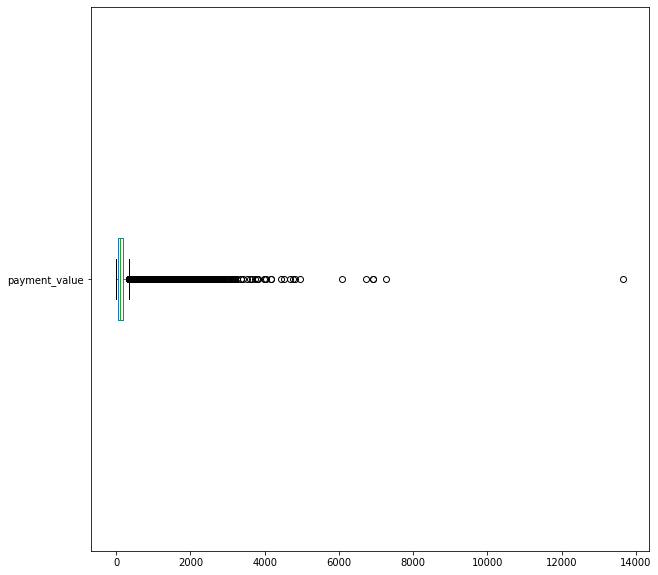

In [125]:
#Boxplot and outlier identification of payment_value
dfcl3.boxplot(column=['payment_value'], fontsize=10, rot=0, grid=False, figsize=(10,10), vert=False)

In [126]:
Q1 = dfcl3['payment_value'].quantile(0.25)
Q3 = dfcl3['payment_value'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5*IQR
boxplot_max = Q3 + 1.5*IQR

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('boxplot_min', boxplot_min)
print('boxplot_max', boxplot_max)

Q1: 60.05
Q3: 175.13
IQR: 115.08
boxplot_min -112.57000000000001
boxplot_max 347.75


In [127]:
#Outlier Removal 
boxplot_min_filter = dfcl3['payment_value']<-112.57
boxplot_max_filter = dfcl3['payment_value']>347.75

dfcl3 = dfcl3[~(boxplot_min_filter|boxplot_max_filter)]
dfcl3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


7.8% of order payment's total rows were removed after excluding outliers

##Converting Data Types

### Orders Dataset

In [128]:
#Data Overview
dfcl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [129]:
dfcl1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [130]:
#Convert the object columns that's showing date and time into datetime
dfcl1['order_purchase_timestamp'] = pd.to_datetime(dfcl1['order_purchase_timestamp'])
dfcl1['order_approved_at'] = pd.to_datetime(dfcl1['order_approved_at'])
dfcl1['order_delivered_carrier_date'] = pd.to_datetime(dfcl1['order_delivered_carrier_date'])
dfcl1['order_delivered_customer_date'] = pd.to_datetime(dfcl1['order_delivered_customer_date'])
dfcl1['order_estimated_delivery_date'] = pd.to_datetime(dfcl1['order_estimated_delivery_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [131]:
#Checking data type after conversion
dfcl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [132]:
dfcl1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


### Customers Dataset


In [133]:
dfcl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [134]:
dfcl2

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


No changes to datatypes needed

### Order Payments Dataset

In [135]:
dfcl3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91667 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              91667 non-null  object 
 1   payment_sequential    91667 non-null  int64  
 2   payment_type          91667 non-null  object 
 3   payment_installments  91667 non-null  int64  
 4   payment_value         91667 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ MB


In [136]:
dfcl3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


No changes to datatypes needed

##Merge Datasets

In [137]:
dfcl1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [138]:
dfcl2

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [139]:
dfcl3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [140]:
#Merging orders(dfcl1) and customers(dfcl2) dataset first
dfmerged1 = dfcl1.merge(dfcl2, how='inner', on='customer_id')
dfmerged1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,12209,sao jose dos campos,SP
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,11722,praia grande,SP
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,45920,nova vicosa,BA
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,28685,japuiba,RJ


In [141]:
#Merging the previous dataset(dfcl1&dfcl2) to the order_payments(dfcl3) dataset
dfmerged2= dfmerged1.merge(dfcl3, how='inner', on='order_id')
dfmerged2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,1,credit_card,1,72.2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP,1,credit_card,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89020,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,5127,sao paulo,SP,1,credit_card,3,155.99
89021,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,12209,sao jose dos campos,SP,1,credit_card,3,85.08
89022,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,11722,praia grande,SP,1,credit_card,3,195.0
89023,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,45920,nova vicosa,BA,1,credit_card,5,271.01


Since the keys we're using to join the dataframes are not duplicated (one to one relationship), the resulting dataframe shouldn't have duplicates as well

In [142]:
dfmerged2['customer_id'].duplicated().sum()

0

In [143]:
dfmerged2['order_id'].duplicated().sum()

0

#**Exploratory Data Analysis**

Splitting the columns into numerical and object/string data type for different descriptive statistics

In [144]:
dfmerged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89025 entries, 0 to 89024
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89025 non-null  object        
 1   customer_id                    89025 non-null  object        
 2   order_status                   89025 non-null  object        
 3   order_purchase_timestamp       89025 non-null  datetime64[ns]
 4   order_approved_at              89025 non-null  datetime64[ns]
 5   order_delivered_carrier_date   89025 non-null  datetime64[ns]
 6   order_delivered_customer_date  89025 non-null  datetime64[ns]
 7   order_estimated_delivery_date  89025 non-null  datetime64[ns]
 8   customer_zip_code_prefix       89025 non-null  int64         
 9   customer_city                  89025 non-null  object        
 10  customer_state                 89025 non-null  object        
 11  payment_sequent

In [145]:
#Numerical Descriptive Statistics
dfnumdesc = dfmerged2[['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value']].describe()
dfnumdesc.loc['kurtosis'] = dfmerged2[['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value']].kurt()
dfnumdesc.loc['skewness'] = dfmerged2[['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value']].skew()
dfnumdesc.loc['variance'] = dfmerged2[['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value']].var()
dfnumdesc

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"89,025.0","89,025.0","89,025.0","89,025.0"
mean,"34,822.550182533",1.0240044931199102,2.692108958157821,113.3285698399326
std,"29,810.703096177534",0.24472559784390366,2.4796138311816263,72.52920939241875
min,"1,003.0",1.0,0.0,0.01
25%,"11,055.0",1.0,1.0,57.1
50%,"24,220.0",1.0,1.0,95.4
75%,"58,038.0",1.0,4.0,153.99
max,"99,980.0",19.0,24.0,347.74
kurtosis,-0.7537351566454635,"1,059.7443144132426",2.911530995157553,0.5158180007566435
skewness,0.802292926721563,24.560418831443766,1.7437340363496892,1.0162349597903066


In [146]:
pd.set_option('display.float_format', '{:,}'.format)

In [147]:
dfnumdesc = round(dfnumdesc,2)
dfnumdesc

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"89,025.0","89,025.0","89,025.0","89,025.0"
mean,"34,822.55",1.02,2.69,113.33
std,"29,810.7",0.24,2.48,72.53
min,"1,003.0",1.0,0.0,0.01
25%,"11,055.0",1.0,1.0,57.1
50%,"24,220.0",1.0,1.0,95.4
75%,"58,038.0",1.0,4.0,153.99
max,"99,980.0",19.0,24.0,347.74
kurtosis,-0.75,"1,059.74",2.91,0.52
skewness,0.8,24.56,1.74,1.02


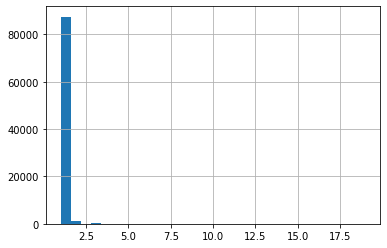

In [148]:
dfmerged2['payment_sequential'].hist(bins=30)

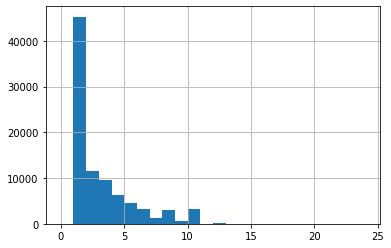

In [149]:
dfmerged2['payment_installments'].hist(bins=24)

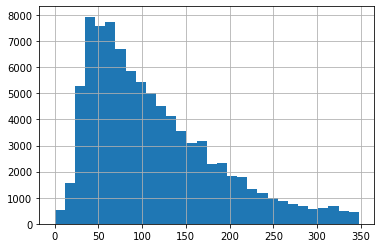

In [150]:
dfmerged2['payment_value'].hist(bins=30)

Firstly we can ignore customer zip code as it's just showing the location and not suited for this type of analysis

Insight:
*   Positive Skewness of payment_sequential, payment_installments and payment_value means that most common data range is from Q1-Q2, with payment_value having a less severe skewness
*   Looking at the mean, customers have a low payment_sequential and payment_installments of 1.02 and 2.69
*   Highest payment_value is 347.74, and the lowest is 0.01. The lowest number can be investigated further, is there actually a product that sells for 0.01?
*   Low use of installments, an indication that maybe the products that are sold are low priced, so there's no incentive to use installments.


In [151]:
#Object/String Descriptive Statistics
dfobjects = dfmerged2.drop(columns=['customer_zip_code_prefix', 'payment_sequential', 'payment_installments', 'payment_value'], inplace= False)
dfobjects.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type
count,89025,89025,89025,89025,89025,89025,89025,89025,89025,89025,89025
unique,89025,89025,1,88557,81882,74349,88330,440,3967,27,4
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-06-01 13:39:44,2017-12-05 10:30:42,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00,sao paulo,SP,credit_card
freq,1,1,89025,3,7,46,3,477,14107,37961,67123
first,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-23 00:00:00,NaN,NaN,NaN


Insight:
*   Highest amount of orders came from san paulo, and from the 'SP' state
*   Most commonly used payment type is using credit card
*   Unusual amount of 477 deliveries on the same day, can be investigated

#Number of orders per month

In [152]:
#Extracting the month and year from the purchase date
dfmerged2['month'] = dfmerged2['order_purchase_timestamp'].dt.month
dfmerged2['year'] = dfmerged2['order_purchase_timestamp'].dt.year
dfmerged2[['month', 'year', 'order_purchase_timestamp']]

,month,year,order_purchase_timestamp
0,10,2017,2017-10-02 10:56:33
1,7,2018,2018-07-24 20:41:37
2,8,2018,2018-08-08 08:38:49
3,11,2017,2017-11-18 19:28:06
4,2,2018,2018-02-13 21:18:39
...,...,...,...
89020,2,2017,2017-02-23 09:05:12
89021,3,2017,2017-03-09 09:54:05
89022,2,2018,2018-02-06 12:58:58
89023,8,2017,2017-08-27 14:46:43


In [153]:
#Group by Year and Month, Count orders
eda1 = dfmerged2['order_id'].groupby([dfmerged2['year'], dfmerged2['month']]).count()
#Series to dataframe
eda1 = pd.DataFrame(eda1)
#Renaming the column
eda1 = eda1.rename(columns={'order_id':'amount_of_orders'})
eda1

amount_of_orders
year month                  
2016 10                  234
     12                    1
2017 1                   661
     2                  1509
     3                  2343
     4                  2107
     5                  3271
     6                  2910
     7                  3621
     8                  3887
     9                  3798
     10                 4098
     11                 6720
     12                 5138
2018 1                  6574
     2                  6115
     3                  6448
     4                  6248
     5                  6207
     6                  5590
     7                  5644
     8                  5901

In [154]:
eda1.reset_index(inplace=True)
eda1

,year,month,amount_of_orders
0,2016,10,234
1,2016,12,1
2,2017,1,661
3,2017,2,1509
4,2017,3,2343
5,2017,4,2107
6,2017,5,3271
7,2017,6,2910
8,2017,7,3621
9,2017,8,3887


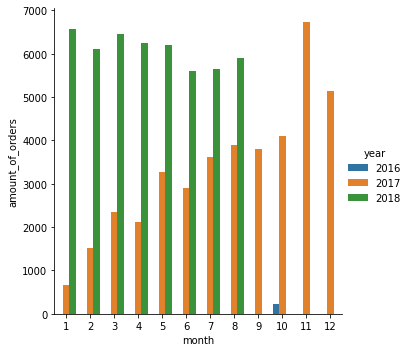

In [169]:
sns.catplot(x='month', y='amount_of_orders', hue='year', data=eda1, kind='bar', ci=None)

Insights:

- 2016 has the lowest amount of orders, maybe it's during this time that the store starts recording their data
- In 2017, generally we have an uptrend from the start of the year to the end of the year.
- In 2018, the store has maintained a relatively high amount of orders compared to previous years, but we have a slight downtrend in terms of orders as well
- On November 2017, the store achieved their largest amount of orders of 6720. We can try to identify why it happened and how can we exceed this number in the future.
- The store had experienced a dip from November 2017 to December 2017. We can investigate why this happened, since it's the holiday season it should be that the amount of orders are more or less the same.

#Daily orders trend

Which day of the week is the busiest


In [156]:
#Extracting day of week where Monday=0, Sunday=6
dfmerged2['day_of_week'] = dfmerged2['order_purchase_timestamp'].dt.dayofweek

In [157]:
#Displaying the data
dfmerged2.sort_values(by=['order_purchase_timestamp'], ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month,year,day_of_week
83552,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,4106,sao paulo,SP,1,boleto,1,45.46,10,2016,0
25465,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,98280,panambi,RS,1,boleto,1,39.09,10,2016,0
87728,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,90040,porto alegre,RS,1,boleto,1,53.73,10,2016,0
79231,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,13185,hortolandia,SP,1,credit_card,6,133.46,10,2016,0
6064,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23,12030,taubate,SP,1,credit_card,4,40.95,10,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60760,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29 11:06:11,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30 23:56:54,2018-09-04,13322,salto,SP,1,credit_card,2,119.42,8,2018,2
88961,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,5863,sao paulo,SP,1,credit_card,7,73.1,8,2018,2
28181,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,38600,paracatu,MG,1,voucher,1,61.29,8,2018,2
62415,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,9541,sao caetano do sul,SP,1,credit_card,1,33.23,8,2018,2


In [158]:
#Count the orders, grouping it by dayofweek
eda2 = dfmerged2['order_id'].groupby(dfmerged2['day_of_week']).count()
#Series to dataframe
eda2 = pd.DataFrame(eda2)
eda2
#Renaming the column
eda2 = eda2.rename(columns={'order_id':'amount_of_orders'})
eda2

,amount_of_orders
day_of_week,
0,14456
1,14324
2,13898
3,13224
4,12582
5,9718
6,10823


In [159]:
eda2.reset_index(inplace=True)
eda2

,day_of_week,amount_of_orders
0,0,14456
1,1,14324
2,2,13898
3,3,13224
4,4,12582
5,5,9718
6,6,10823


In [160]:
#Changing the day of week from 0 to Monday and so on
eda2['day_of_week'] = eda2['day_of_week'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
eda2

,day_of_week,amount_of_orders
0,Monday,14456
1,Tuesday,14324
2,Wednesday,13898
3,Thursday,13224
4,Friday,12582
5,Saturday,9718
6,Sunday,10823


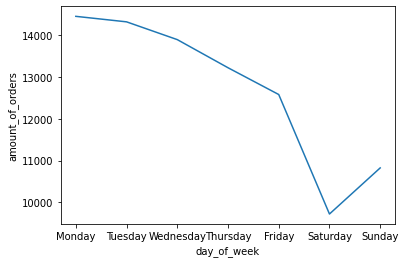

In [161]:
sns.lineplot(x='day_of_week', y='amount_of_orders', data=eda2)

Insights:
- Highest amount of orders are at Monday, and the lowest is at Saturday
- We have a downtrend of the amount of orders from the start of the week until Saturday, then it had a slight increase during Sunday
- It could be that during Saturday people are going out more and don't have the tendency to shop during this day
- We could send an email/push notification/promotion every Saturday to notify them and improve the amount of orders

#Percentage of orders per payment type


In [162]:
#Count orders, group by payment type
eda3 = dfmerged2['order_id'].groupby(dfmerged2['payment_type']).count()
#Series to dataframe
eda3 = pd.DataFrame(eda3)
#Renaming the column
eda3 = eda3.rename(columns={'order_id':'amount_of_orders'})
eda3

,amount_of_orders
payment_type,
boleto,17963
credit_card,67123
debit_card,1405
voucher,2534


In [163]:
eda3.reset_index(inplace=True)
eda3

,payment_type,amount_of_orders
0,boleto,17963
1,credit_card,67123
2,debit_card,1405
3,voucher,2534


In [164]:
#Total orders
total_orders = eda3['amount_of_orders'].sum()
total_orders

89025

In [165]:
#Percentage of orders per payment type
eda3['percentage_of_orders'] = (eda3['amount_of_orders']/total_orders)*100
eda3

,payment_type,amount_of_orders,percentage_of_orders
0,boleto,17963,20.177478236450437
1,credit_card,67123,75.39792193204156
2,debit_card,1405,1.5782083684358326
3,voucher,2534,2.846391463072171


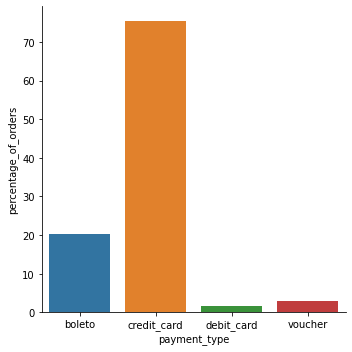

In [166]:
sns.catplot(x='payment_type', y='percentage_of_orders', data=eda3, kind='bar', ci=None)

Insights:
- Credit card by far is the most frequently used payment type, 75.3% of total orders uses credit card
- Boleto comes 2nd with 20.1% of total orders, Voucher 2.8% of total orders, debit card 1.5% of total orders
- It could be that this is normal and most people are just more comfortable using a credit card, or credit card is the easiest form of payment on this e-commerce store.
- Investigating the payment process for each payment type, are there any difficulties with other payment types besides credit card? It could be that conversion rates for other payment types are low because it takes more time/difficult to pay using those methods.
- Improving the payment process for other payment types may increase the amount of orders overall, since there are customers that don't have a credit card and their payment options are limited.
- Credit card is the most frequently used, but from previous descriptive statistics, payment installments are low and underutilized. Payment installments are supposed to help customers afford higher priced items, meaning it could be the case that we're missing out on selling higher priced items that have higher profit margins.